# **Introduction**

* **Breast cancer:** is a disease in which abnormal breast cells grow
out of control and form tumours.If left unchecked,the tumours can spread throughout the body and become fatal.


* (**Target to predict**):
diagnosis: This column contains the diagnosis results, which typically have two possible values:

  M (Malignant): Indicates the presence of cancerous cells.
B (Benign): Indicates the presence of non-cancerous cells.

* **I will use RandomForest & ANN to predict the target..**


# Import libraries

We will use to sklearn library and keras models.

In [165]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy

## Other
import os, joblib
import missingno as msno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
#from sklearn_features.transformers import DataFrameSelector


## sklearn -- metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## sklearn -- Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


## keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

# EDA

In [166]:
data= pd.read_csv("Breast_canser_data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [168]:
df = data.copy()

In [169]:
df = df.drop(['Unnamed: 32','id'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [171]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [172]:
df=df.rename(columns={"diagnosis":"target"})
 #B:non-cancerous   , M:cancerous

In [173]:
target_cat=df['target'].unique()
target_cat

array(['M', 'B'], dtype=object)

categories of (target) --- 
 target
B    357
M    212
Name: count, dtype: int64
********************************************************************************


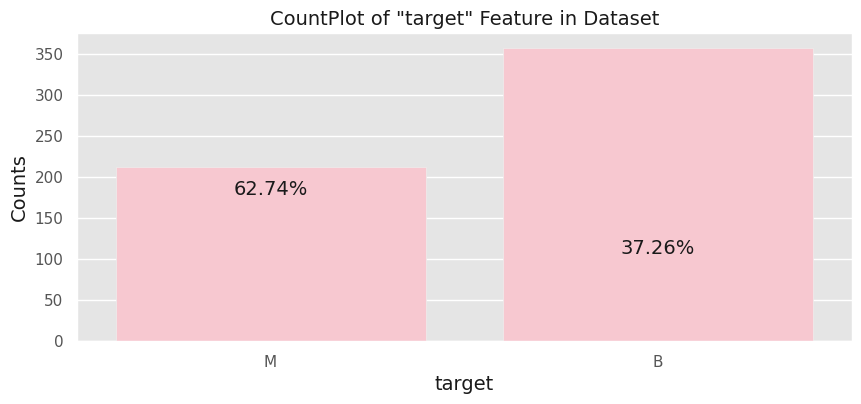

In [174]:
### Check the Distribution of (target) Feature in Dataset   #B:non-cancerous   , M:cancerous
target_values = df['target'].value_counts()
print('categories of (target) --- \n', target_values)
print('**'*40)

## Plotting
plt.figure(figsize=(10, 4))
sns.countplot(x='target', data=df, color = 'pink')
plt.title('CountPlot of "target" Feature in Dataset', fontsize=14, c='k')
plt.xlabel('target', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')

## To show the percentage of each bar
for i in range(len(target_values)):  ## loop over the numbers of categories (number of bars)
    each_count = target_values.values[i]
    each_text = f'{((100*each_count)/ len(df)):.2f}%'
    plt.text(x=i, y=each_count/2, s=each_text, c='k', fontsize=14, ha='center')

In [175]:
df.isnull().sum()

target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

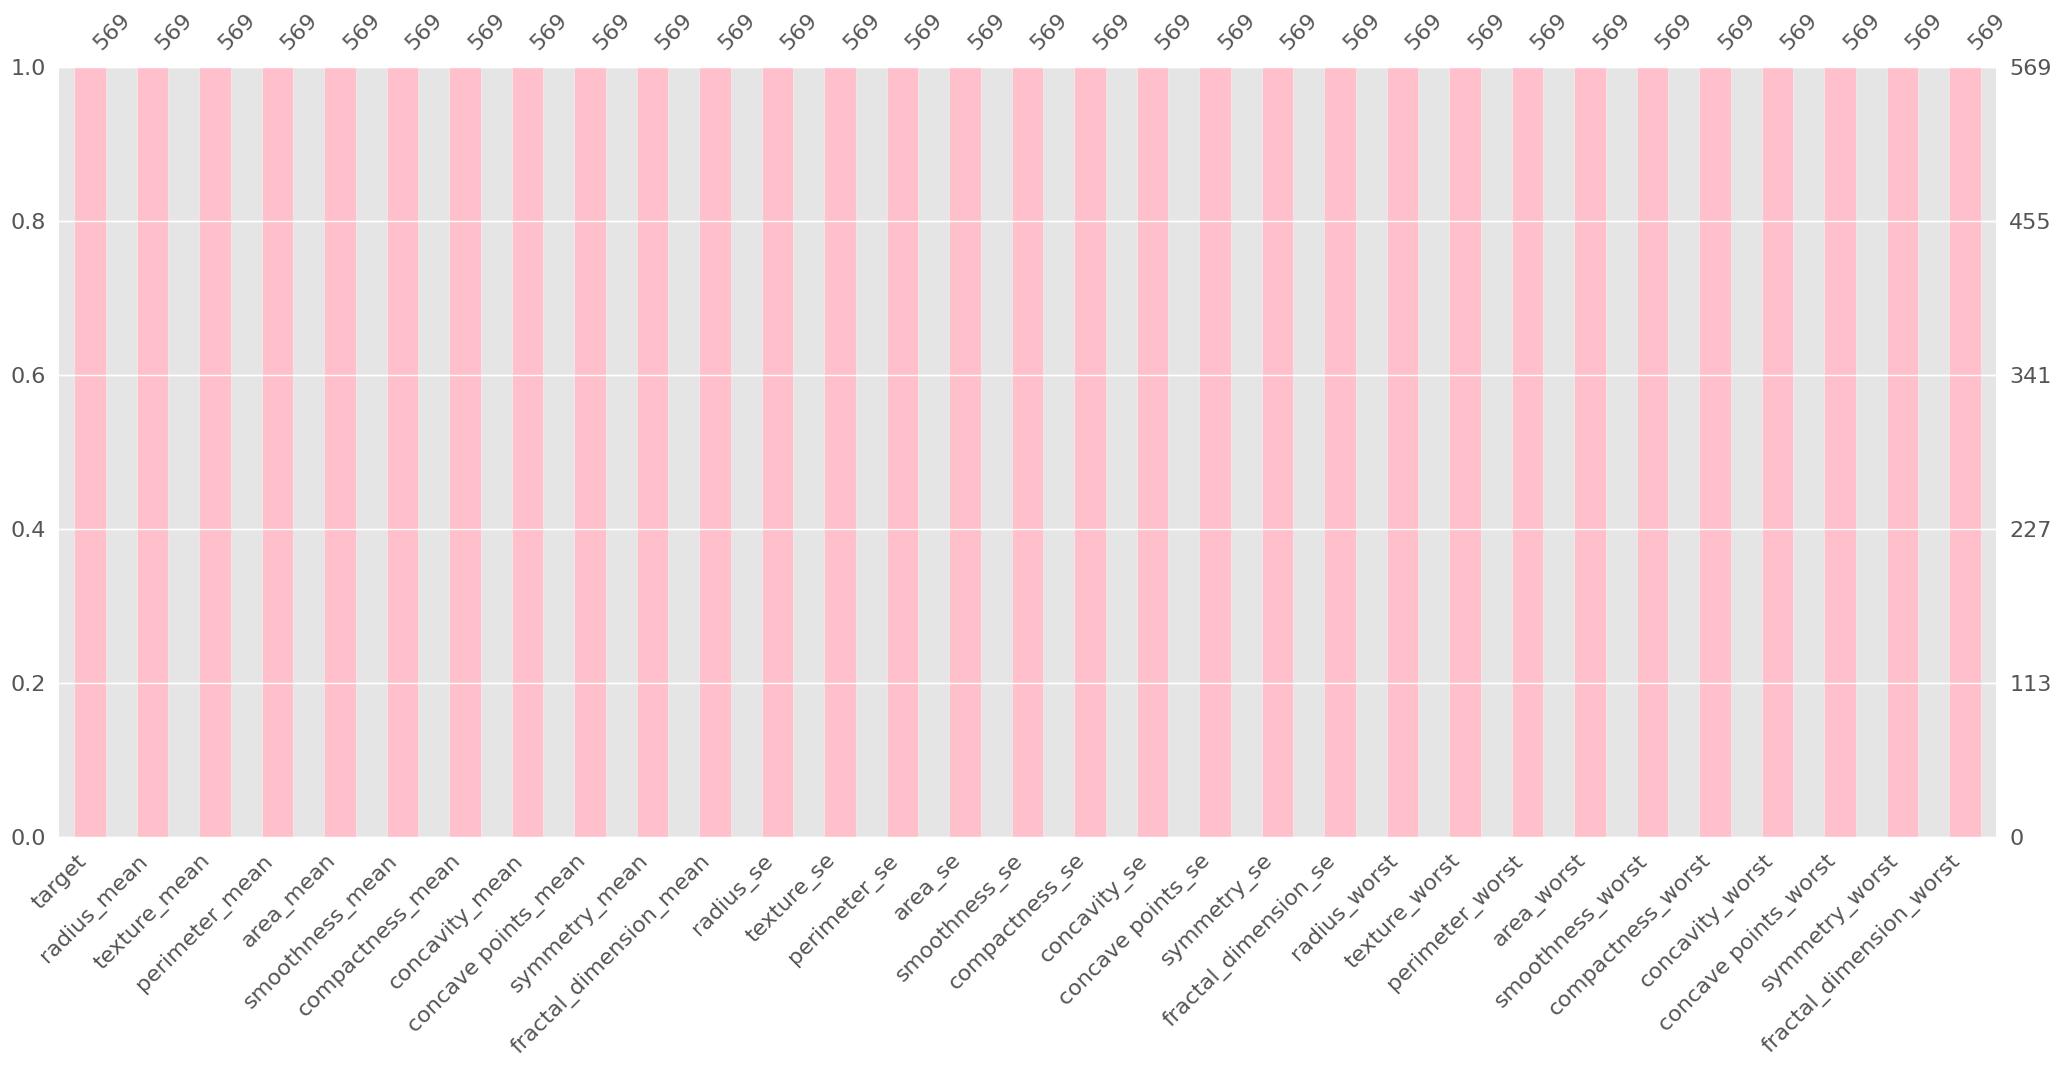

In [176]:
msno.bar(df, color="pink")

**comment:** the data has 0 nulls and all columns are clean.

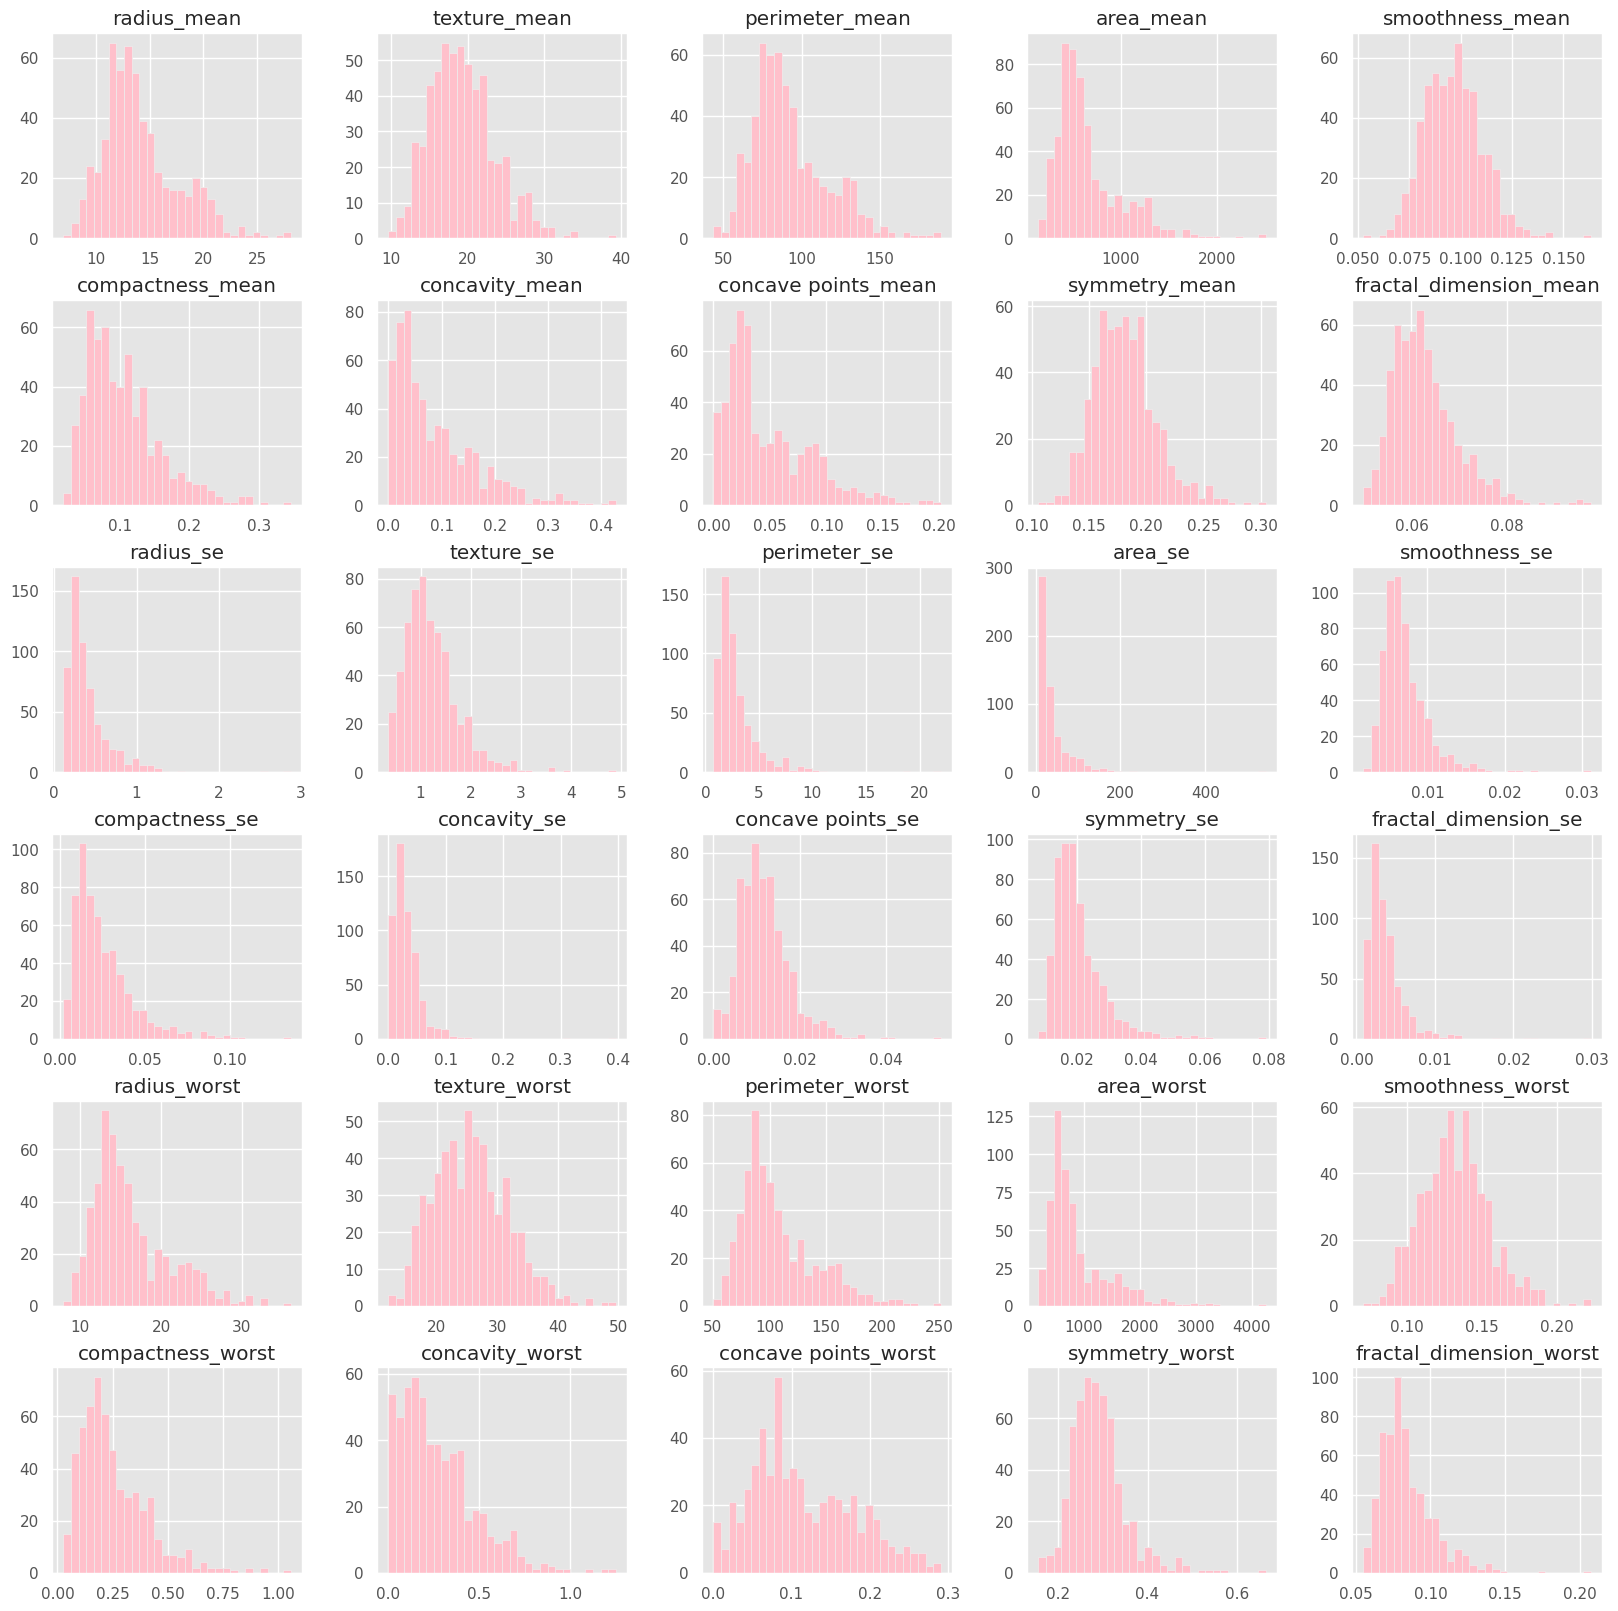

In [177]:
## Histogram Distr. of Numerical Features in Dataset
df.hist(bins=30, figsize=(20, 20), color = 'pink')
plt.show()

**comment**: we can detect the ranges of the data from x-axis of histogram.

In [178]:
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

In [179]:
corr_matrix= df.corr()
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


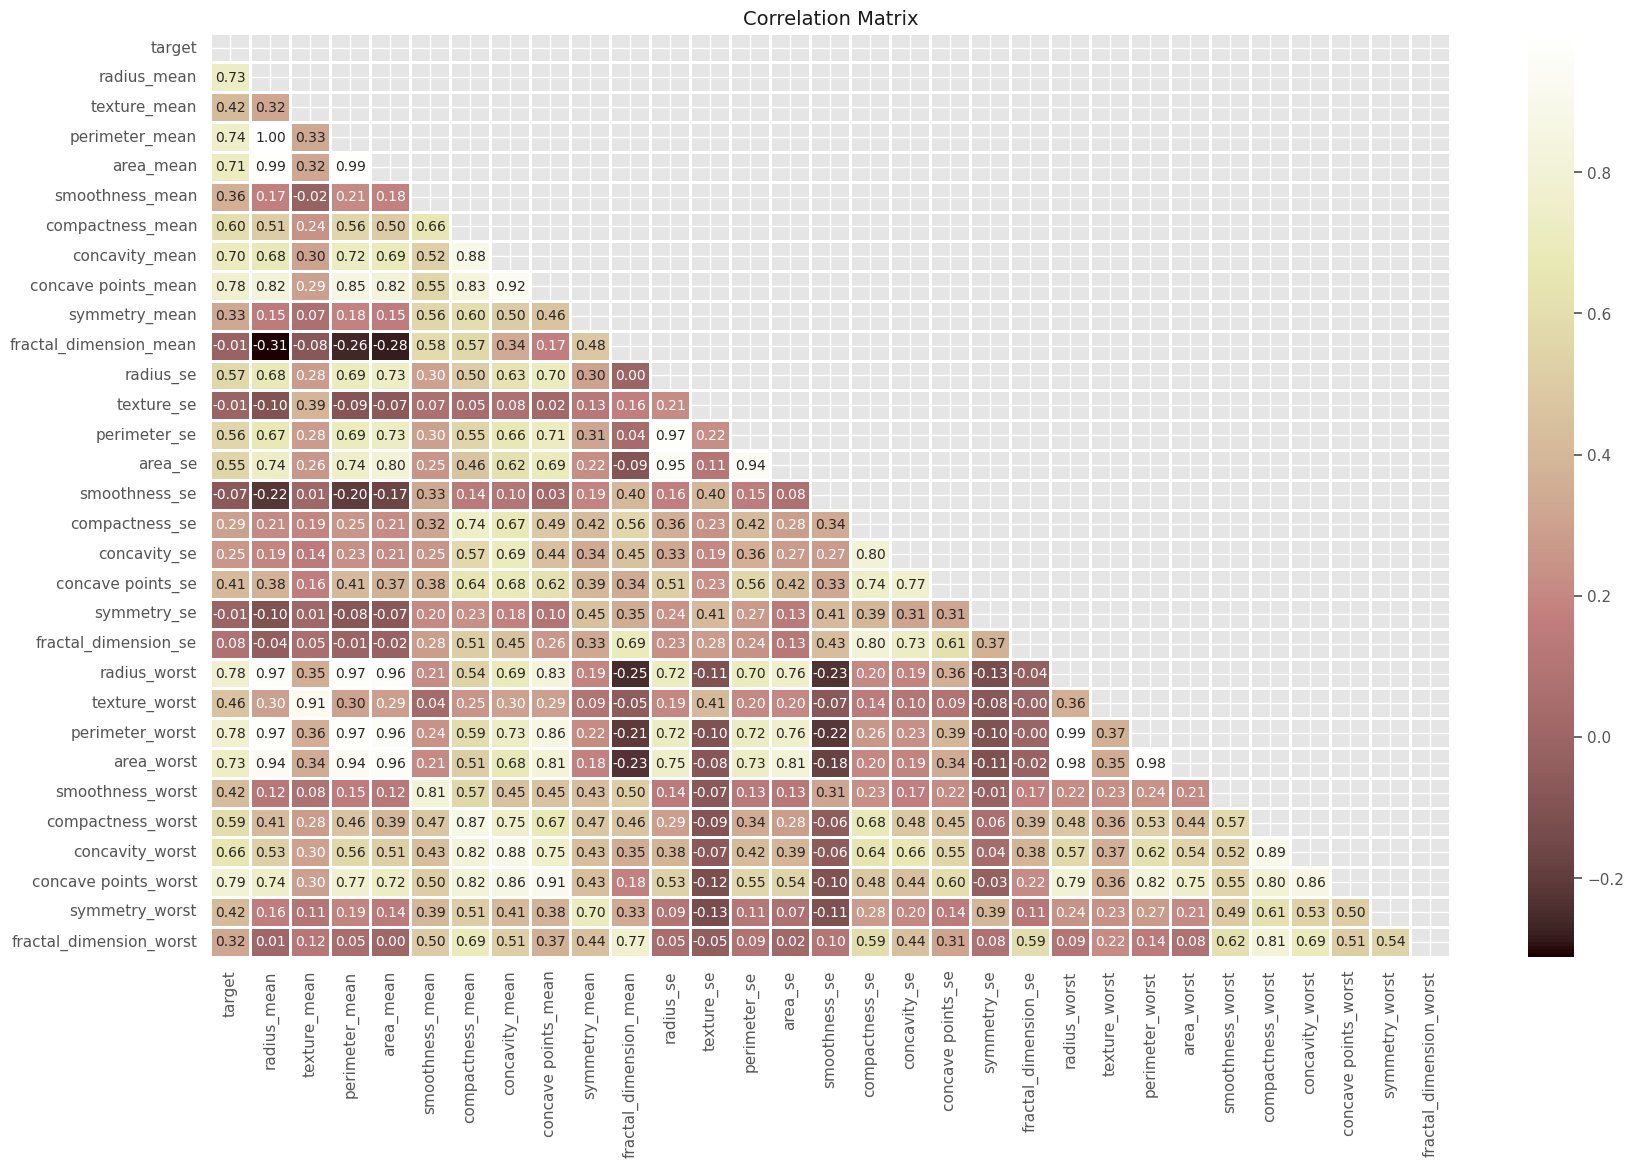

In [180]:
# heatmap
plt.figure(figsize=(20,12))
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, cmap='pink', annot=True, fmt = ".2f")
title=plt.title('Correlation Matrix', fontsize=14, c='k')
plt.show()

**comment**: the heatmap show how the target correlate with features.

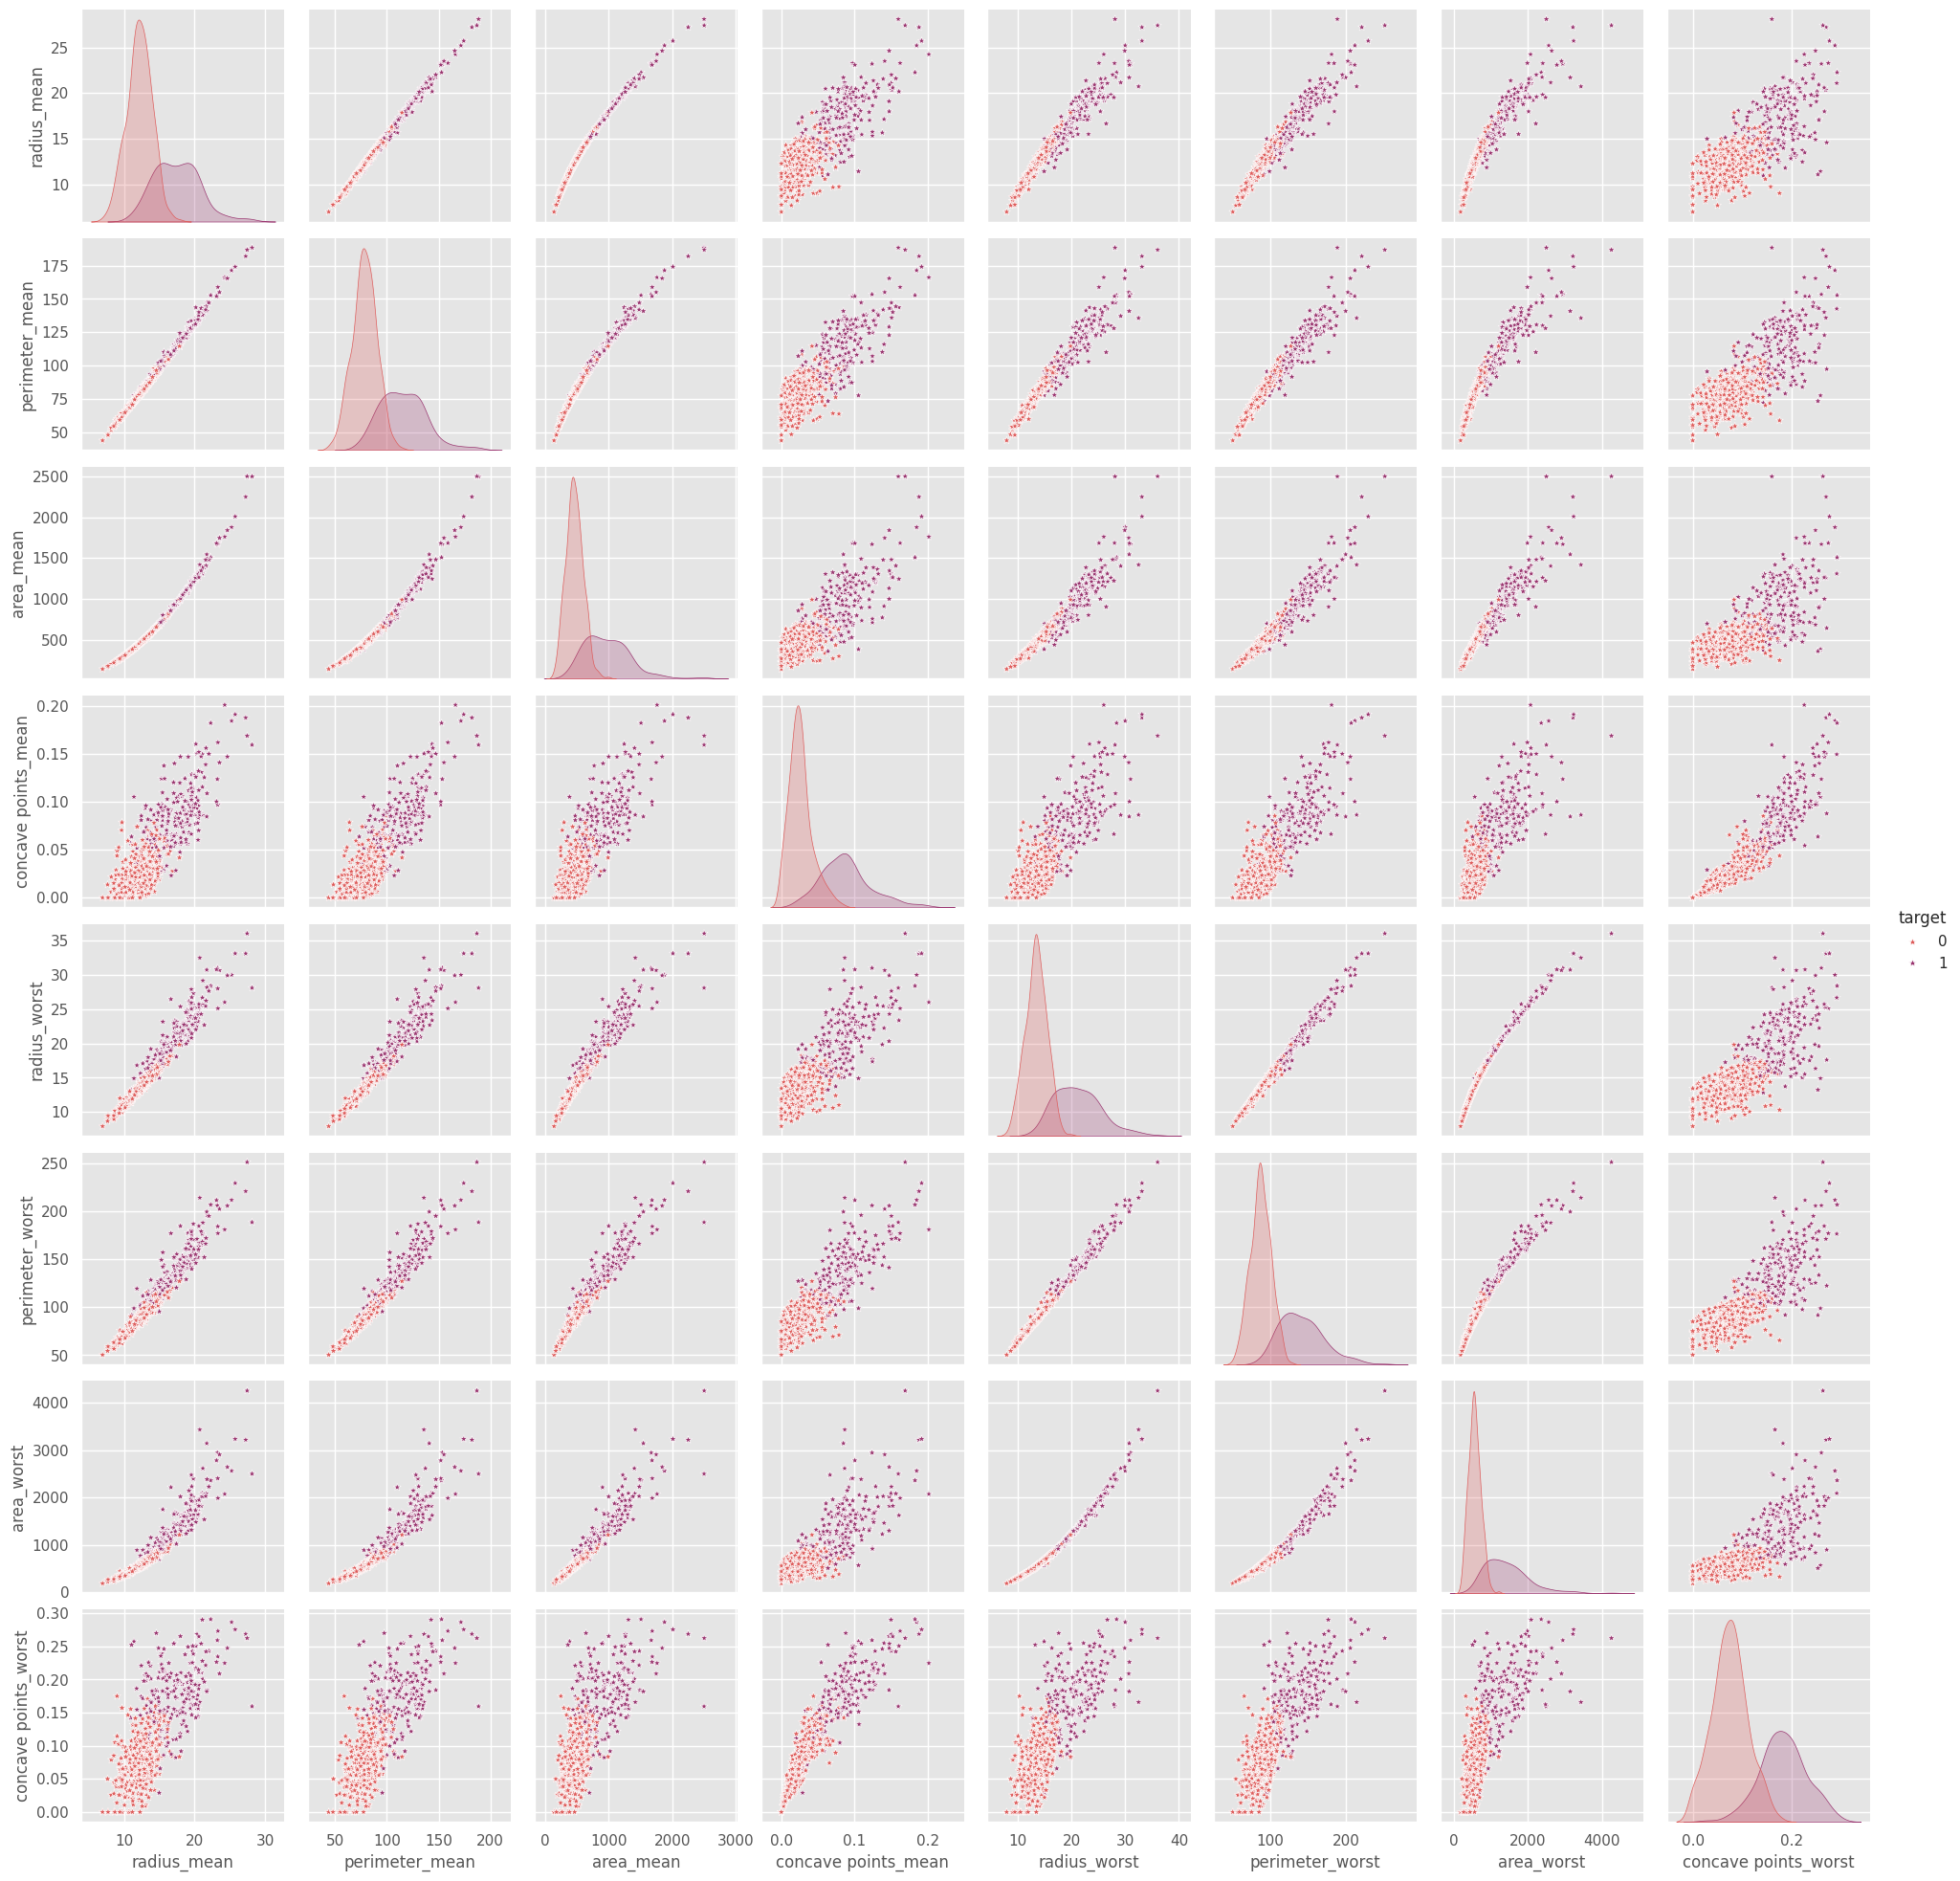

In [181]:
sns.pairplot(df[corr_features],diag_kind="kde",markers="*",hue="target", palette="flare")
plt.show()

**comment:** pairplot with hue parameter show us bivarient visualization and declare the relation between the target and the feature and between the features and each others.

In [182]:
y=df.target
x= df.drop(["target"],axis=1)
coulumns=x.columns.tolist()

In [183]:
clf=LocalOutlierFactor()
out_predict=clf.fit_predict(x)
X_score=clf.negative_outlier_factor_
outlier_score=pd.DataFrame()
outlier_score["Score"]=X_score
outlier_score["Score"].head(20)

0    -1.422440
1    -1.066782
2    -0.978948
3    -1.596933
4    -1.069936
5    -1.773071
6    -1.015687
7    -1.251746
8    -1.380515
9    -1.644357
10   -0.997602
11   -1.061786
12   -1.129491
13   -1.258444
14   -0.968637
15   -1.093351
16   -1.139381
17   -1.060493
18   -1.410671
19   -0.972248
Name: Score, dtype: float64

In [184]:
threshold=-2.5
filtre=outlier_score["Score"]<threshold
outlier_index=outlier_score[filtre].index.tolist()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

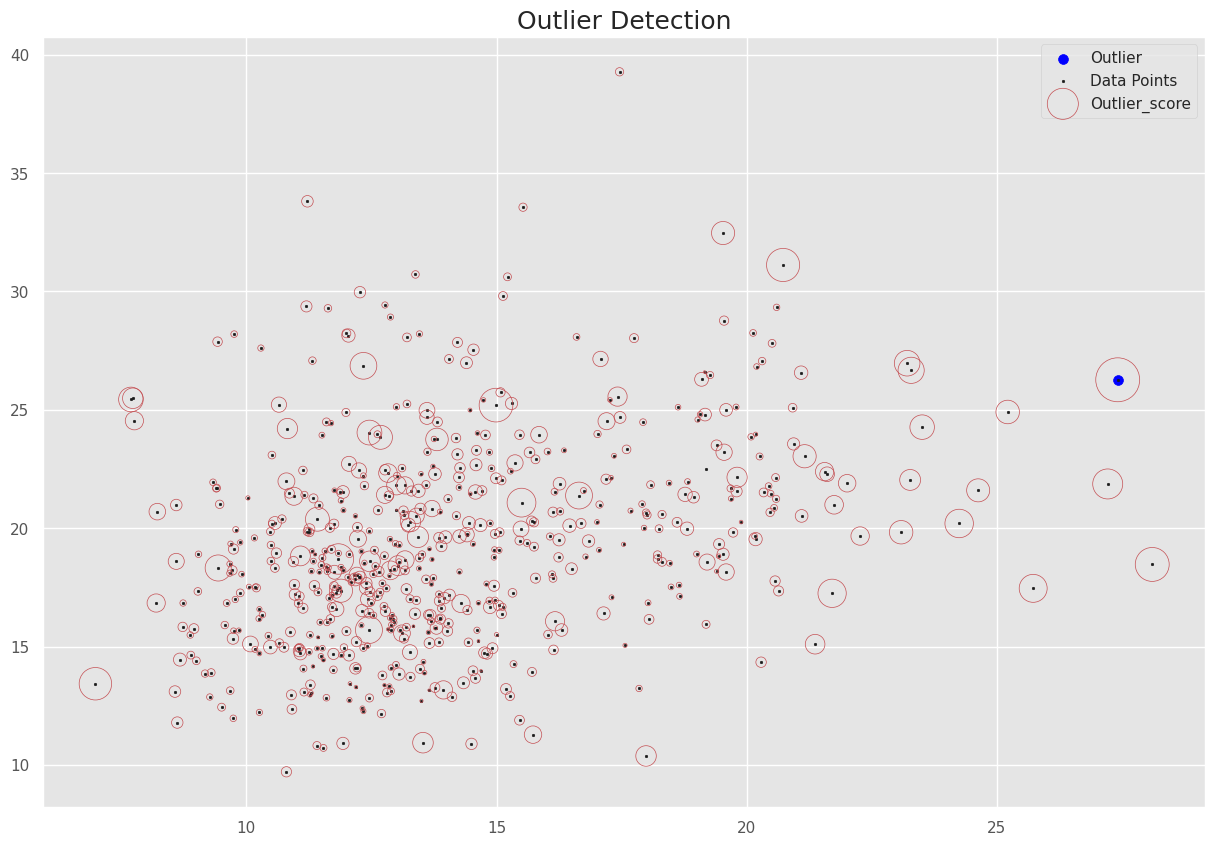

In [185]:
plt.figure()
plt.figure(figsize=(15, 10))
plt.title("Outlier Detection", fontsize=18)
plt.scatter(x.iloc[outlier_index,0],x.iloc[outlier_index,1],color="blue",s=50,label="Outlier")
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="k",s=3,label="Data Points")
radius=(X_score.max()-X_score)/(X_score.max()-X_score.min())
outlier_score["radius"]=radius
plt.scatter(x.iloc[:,0],x.iloc[:,1],color="r",s=1000*radius,label="Outlier_score",facecolors="none")
plt.legend()
plt.show

**comment:** the graph indicates that the data has no outliers.

Black points: All observations, showing the overall distribution and density of the dataset.

Blue points: Identified outliers based on the LOF algorithm, highlighted for easy identification.

Red circles: Represent the outlier scores, with size proportional to the level of being an outlier, providing a visual indication of outlier strength.

# Building models

In [186]:
X = df.drop(columns=['target'], axis=1)   ## Features
y = df['target']   ## target

In [187]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: target, Length: 569, dtype: int64

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)


## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (483, 30)
y_train shape --  (483,)
X_test shape --  (86, 30)
y_test shape --  (86,)


**Pipeline is easier to interfernce at new data**

In [189]:
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols) #In this case, all columns are numerical columns.
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Categorical Columns : 
 []


In [190]:
## Building a pipeline for numerical variables
num_pipeline = Pipeline(steps=[
                        ('scaler', StandardScaler())
                              ]
                       )
## deal with (num_pipline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = num_pipeline.fit_transform(X_train[num_cols])  ## train
X_test_final = num_pipeline.transform(X_test[num_cols])  ## test

In [191]:
# ## We can get much much easier like the following
# ## numerical pipeline
# num_pipeline = Pipeline([
#                         ('selector', DataFrameSelector(num_cols)),    ## select only these columns
#                         ('imputer', SimpleImputer(strategy='median')),
#                         ('scaler', StandardScaler())
#                         ])

# ## categorical pipeline
# categ_pipeline = Pipeline(steps=[
#             ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
#             ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#             ('OHE', OneHotEncoder(sparse=False))])

# ## concatenate both two pipelines
# total_pipeline = FeatureUnion(transformer_list=[
#                                             ('num_pipe', num_pipeline),
#                                             ('categ_pipe', categ_pipeline)
#                                                ]
#                              )
# ## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
# X_train_final = total_pipeline.fit_transform(X_train)
# X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

# Random Forest(RF)

In [192]:
forest_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130, random_state=42, n_jobs=-1)
forest_clf.fit(X_train_final, y_train)  ## train

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130, n_jobs=-1, random_state=42)

In [193]:

# Perform cross-validation and get accuracy scores
accuracy_scores_forest = cross_val_score(estimator=forest_clf, X=X_train_final, y=y_train,
                                         cv=5, scoring='accuracy', n_jobs=-1)
print(f'Accuracy Scores Using RandomForest --- {np.round(accuracy_scores_forest, 4)}')
print(f'Mean of Accuracy Scores Using RandomForest --- {accuracy_scores_forest.mean():.4f}')

print('****'*30)

# Get cross-validated predictions
y_pred_forest = cross_val_predict(estimator=forest_clf, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

# Calculate accuracy using cross-validated predictions
accuracy_pred_forest = accuracy_score(y_train, y_pred_forest)
print(f'Accuracy after prediction Using RandomForest --- {accuracy_pred_forest:.4f}')

# Additional metrics
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred_forest))

print('Classification Report:')
print(classification_report(y_train, y_pred_forest))

Accuracy Scores Using RandomForest --- [0.9794 0.9794 0.9588 0.9688 0.9375]
Mean of Accuracy Scores Using RandomForest --- 0.9648
************************************************************************************************************************
Accuracy after prediction Using RandomForest --- 0.9648
Confusion Matrix:
[[297   6]
 [ 11 169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       303
           1       0.97      0.94      0.95       180

    accuracy                           0.96       483
   macro avg       0.97      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483



# RF tuning

In [194]:
## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50),
                      'max_depth': np.arange(4, 20, 2),
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_clf, param_distributions=params_best_forest,
                                          n_iter=20, scoring='accuracy',
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=0.990 total time=   0.8s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=0.969 total time=   0.8s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=0.948 total time=   0.5s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=0.958 total time=   0.5s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=0.938 total time=   0.5s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=0.990 total time=   0.9s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=0.969 total time=   0.9s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=0.948 total time=   0.9s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=0.958 total time=   0.8s
[CV 5/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=0.938 total time=   0.9

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_depth=10,
                                                    max_features=0.5,
                                                    min_samples_leaf=2,
                                                    min_samples_split=3,
                                                    n_estimators=130, n_jobs=-1,
                                                    random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='accuracy', verbose=6)

In [195]:
## Get the best Params
best_forest_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_forest_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': 150, 'max_samples': 0.7, 'max_depth': 18}
best_forest --  RandomForestClassifier(criterion='entropy', max_depth=18, max_features=0.5,
                       max_samples=0.7, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=150, n_jobs=-1, random_state=42)


In [197]:

# Perform cross-validation and get accuracy scores
accuracy_scores_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train,
                                         cv=5, scoring='accuracy', n_jobs=-1)
print(f'Accuracy Scores Using RandomForest --- {np.round(accuracy_scores_forest, 4)}')
print(f'Mean of Accuracy Scores Using RandomForest --- {accuracy_scores_forest.mean():.4f}')

print('****'*30)

# Get cross-validated predictions
y_pred_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)

# Calculate accuracy using cross-validated predictions
accuracy_pred_forest = accuracy_score(y_train, y_pred_forest)
print(f'Accuracy after prediction Using RandomForest --- {accuracy_pred_forest:.4f}')

# Additional metrics
print('Confusion Matrix:')
print(confusion_matrix(y_train, y_pred_forest))

print('Classification Report:')
print(classification_report(y_train, y_pred_forest))

Accuracy Scores Using RandomForest --- [0.9897 0.9691 0.9485 0.9583 0.9375]
Mean of Accuracy Scores Using RandomForest --- 0.9606
************************************************************************************************************************
Accuracy after prediction Using RandomForest --- 0.9607
Confusion Matrix:
[[296   7]
 [ 12 168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       303
           1       0.96      0.93      0.95       180

    accuracy                           0.96       483
   macro avg       0.96      0.96      0.96       483
weighted avg       0.96      0.96      0.96       483



**comment:** The acurracy are approximately equal for two models.



In [199]:
## Getting the Features Importance (they are normalized in RF, sum=1)
feat_import_forest = {}   ## to append in it
for name, score in zip(num_cols, best_forest.feature_importances_[:29]):  ## take only the first 11 Numerical Cols
    feat_import_forest[name] = score

## Features are keys, Importance is the value
keys_forest = feat_import_forest.keys()
values_forest = feat_import_forest.values()

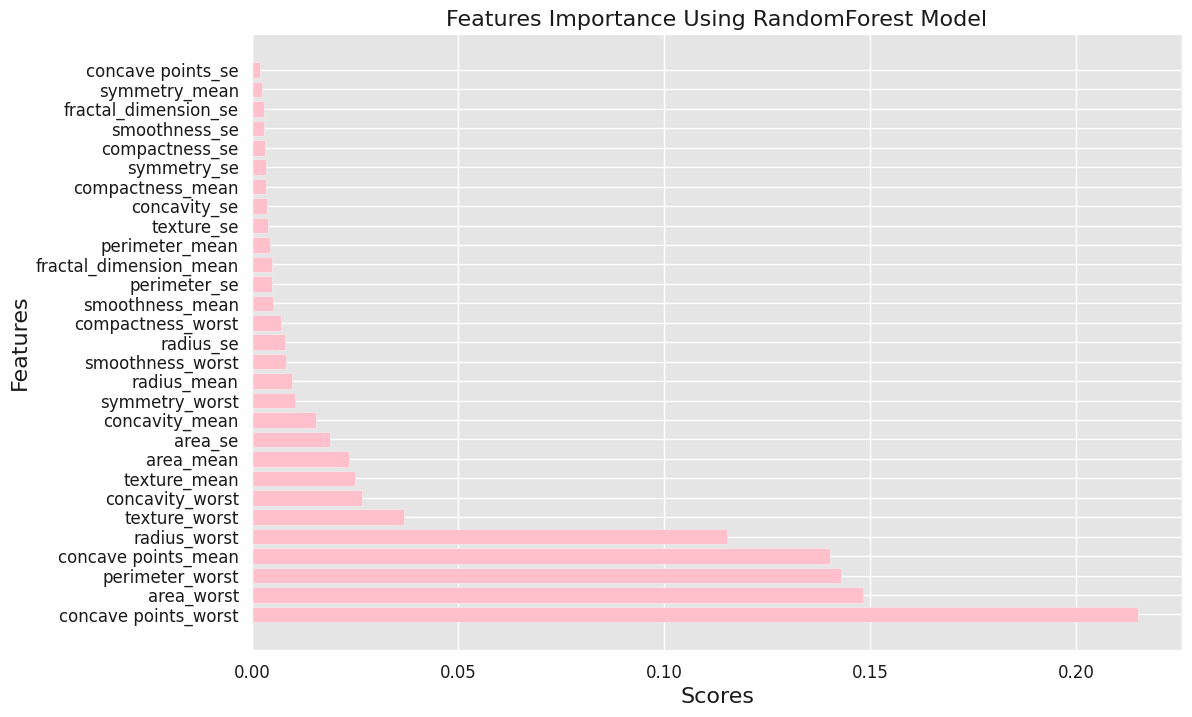

In [205]:
## to DF and then plotting
df_feat_import_forest = pd.DataFrame({'Features': keys_forest, 'Scores': values_forest})
df_feat_import_forest = df_feat_import_forest.sort_values(by='Scores', ascending=False)

## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_forest['Features'], width=df_feat_import_forest['Scores'], color='pink')
plt.title('Features Importance Using RandomForest Model', fontsize=16, c='k')
plt.xlabel('Scores', fontsize=16, c='k')
plt.ylabel('Features', fontsize=16, c='k')
plt.xticks(c='k', fontsize=12)
plt.yticks(c='k', fontsize=12)
plt.grid('on')
plt.show()

**comment:** from the graph, concave points_worst is the most important feature.

> Add blockquote



In [206]:
## Download using joblib
joblib.dump(best_forest, 'model_RandomForest.pkl')

['model_RandomForest.pkl']

In [207]:
## to load this pretrained Model
loaded_model = joblib.load('model_RandomForest.pkl')
loaded_model

RandomForestClassifier(criterion='entropy', max_depth=18, max_features=0.5,
                       max_samples=0.7, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=150, n_jobs=-1, random_state=42)

In [213]:
# Now, we can touch Test Dataset using (loaded_model == best_forest) -- tuned RF Model
y_pred_test = loaded_model.predict(X_test_final)  ## Remember X_test_final --> is processed and ready (take care)
## accuracy on test after finishing all my work
accuracy_pred_forest = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on test Dataset using RF -- {accuracy_pred_forest}')   ## Niceeee :)

Accuracy on test Dataset using RF -- 0.9534883720930233


# Building ANN